In [1]:
from clustering import *
from downloaddata import *
from portfolio_and_performance import *
from trees import *

In [2]:
with open("SP100list.txt") as f:
    nodenames = f.read().splitlines()
data = get_quandl_data(nodenames, startdate='1900-01-01', enddate='2017-06-27')
data.to_csv("SP100_full.csv")

KeyboardInterrupt: 

In [2]:
window = 100
space = 10
thresh = 95

In [3]:
trees = construct_trees(filename="SP100_full.csv", thresh=thresh, window=window,
                        enddate='1997-07-17',
                        startdate='1995-01-03',
                        space=space, tree_type='MST')
sorteddates = sorted(trees.keys(), key=lambda d: map(int, d.split('-')))
IGtrees = {}
for key in sorteddates:
    IGtrees[key] = NXtoIG(trees[key])

In [4]:
clustersNewman, IGclustersNewman = construct_clusters(IGtrees, method='Newman')
clustersClausetNewman, IGclustersClausetNewman = construct_clusters(IGtrees, method="ClausetNewman")

Newman           12.924162
ClausetNewman    10.553792
dtype: float64


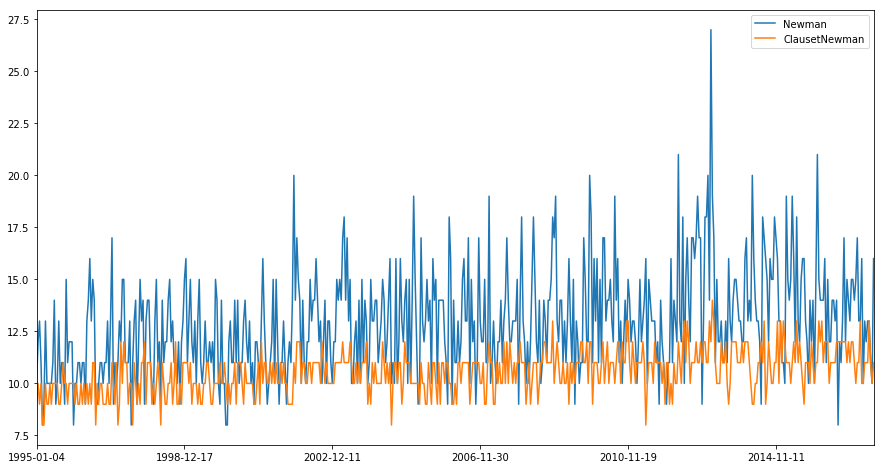

In [5]:
nofclusters = pd.DataFrame(index=sorteddates)
nofclusters['Newman'] = [len(clustersNewman[sorteddates[i]]) for i in range(0, len(sorteddates))]
nofclusters['ClausetNewman'] = [len(clustersClausetNewman[sorteddates[i]]) for i in range(0, len(sorteddates))]
print(np.mean(nofclusters))
%matplotlib inline
nofclusters.plot(figsize=(15, 8))

In [5]:
NewmanUniverse = {}
ClausetNewmanUniverse = {}
for measure in ['degree', 'closeness', 'betweenness']:
    NewmanUniverse[measure] = clustering_universe(trees, clustersNewman, measure, quantile=0)
    ClausetNewmanUniverse[measure] = clustering_universe(trees, clustersClausetNewman, measure, quantile=0)

universes = {}
universes['Newman'] = NewmanUniverse
universes['ClausetNewman'] = ClausetNewmanUniverse

In [7]:
text_file = open("Central-NewmanBetweenness-20170627.txt", "w")
for t in sorteddates:
    text_file.write('%s: ' % t)
    for stock in universes['Newman']['betweenness'][t]['central']:
        text_file.write('%s ' % stock)
    text_file.write('\n')
text_file.close()

In [16]:
r[tt:tt].columns

Index([u'AAPL', u'MSFT', u'JNJ', u'XOM', u'JPM', u'GE', u'WFC', u'T', u'PG',
       u'BAC', u'PFE', u'CVX', u'CMCSA', u'VZ', u'HD', u'MRK', u'UNH', u'C',
       u'KO', u'PEP', u'CSCO', u'INTC', u'DIS', u'ORCL', u'MO', u'IBM',
       u'AMGN', u'MMM', u'MCD', u'MDT', u'BA', u'WMT', u'CELG', u'HON', u'BMY',
       u'GILD', u'SLB', u'UTX', u'UNP', u'SBUX', u'ABT', u'AGN', u'QCOM',
       u'LLY', u'CVS', u'USB', u'TXN', u'TWX', u'DOW', u'NKE', u'DD', u'COST',
       u'LMT', u'NEE', u'CL', u'WBA', u'LOW', u'MS', u'AXP', u'CAT', u'DUK',
       u'BIIB', u'GD', u'AIG', u'COP', u'FDX', u'DHR', u'BK', u'SPG', u'SO',
       u'RTN', u'OXY', u'F', u'COF', u'EMR', u'HAL', u'EXC', u'ALL', u'TGT',
       u'FOX'],
      dtype='object')

In [6]:
performance_weighted, performance_unweighted = benchmark_performance("SP100_full.csv",thresh=thresh,
                                                                     universes=universes, window=window )
performance_comparison_weighted = {'benchmark': performance_weighted}
performance_comparison_unweighted = {'benchmark': performance_unweighted}

1995-01-05
[[  5.66216761e-04   1.35047469e-04   6.71873661e-05 ...,   2.61033751e-05
    5.52636130e-05   5.94536124e-05]
 [  1.35047469e-04   2.19795829e-04   6.55621759e-05 ...,   6.34754042e-07
    5.79512086e-05   5.76359973e-05]
 [  6.71873661e-05   6.55621759e-05   1.49529722e-04 ...,   3.84449021e-06
    3.11910648e-05   6.13638211e-05]
 ..., 
 [  2.61033751e-05   6.34754042e-07   3.84449021e-06 ...,   1.61474917e-04
   -1.32998334e-05   1.89702529e-05]
 [  5.52636130e-05   5.79512086e-05   3.11910648e-05 ...,  -1.32998334e-05
    2.85023581e-04   6.73816844e-05]
 [  5.94536124e-05   5.76359973e-05   6.13638211e-05 ...,   1.89702529e-05
    6.73816844e-05   2.16979848e-04]]
1995-01-19
[[  7.22638045e-04   1.51397325e-04   7.32708107e-05 ...,   3.74597658e-05
    6.50552932e-05   3.60852235e-05]
 [  1.51397325e-04   2.29034750e-04   7.49121972e-05 ...,  -9.65783215e-06
    5.97665901e-05   5.51211417e-05]
 [  7.32708107e-05   7.49121972e-05   1.42444590e-04 ...,   4.14940469e-06

[[  7.49389226e-04   6.59273230e-05   6.14449226e-06 ...,   2.39022540e-05
    8.48290253e-06  -2.06554973e-05]
 [  6.59273230e-05   2.61506969e-04   3.23403223e-05 ...,   5.09994813e-05
    3.94326683e-05   4.89761111e-06]
 [  6.14449226e-06   3.23403223e-05   1.12802023e-04 ...,   8.53287382e-06
    1.24223285e-05   2.15965569e-05]
 ..., 
 [  2.39022540e-05   5.09994813e-05   8.53287382e-06 ...,   1.38309349e-04
    1.50158133e-05   2.87358898e-05]
 [  8.48290253e-06   3.94326683e-05   1.24223285e-05 ...,   1.50158133e-05
    2.28193321e-04   5.06152349e-05]
 [ -2.06554973e-05   4.89761111e-06   2.15965569e-05 ...,   2.87358898e-05
    5.06152349e-05   2.81255630e-04]]
1995-05-01
[[  7.72848991e-04   3.98903356e-05   2.73680720e-06 ...,   2.91967485e-05
    1.63337367e-05  -4.83284226e-05]
 [  3.98903356e-05   2.83491440e-04   3.35311973e-05 ...,   4.27569629e-05
    5.01584100e-05   3.22593341e-06]
 [  2.73680720e-06   3.35311973e-05   1.22971815e-04 ...,  -3.34099589e-06
    2.2662

1995-07-12
[[  6.25098049e-04   2.01851075e-05  -3.80000101e-05 ...,   2.55563025e-05
   -9.90359656e-06  -1.26440135e-05]
 [  2.01851075e-05   3.60659426e-04   4.32809309e-05 ...,   9.49810755e-05
    3.64506406e-05  -4.60334459e-06]
 [ -3.80000101e-05   4.32809309e-05   1.87228632e-04 ...,   4.04142727e-05
    4.98809145e-05   5.01660161e-05]
 ..., 
 [  2.55563025e-05   9.49810755e-05   4.04142727e-05 ...,   2.25301907e-04
    4.30000961e-05   2.54306809e-05]
 [ -9.90359656e-06   3.64506406e-05   4.98809145e-05 ...,   4.30000961e-05
    2.15222829e-04   1.27254516e-05]
 [ -1.26440135e-05  -4.60334459e-06   5.01660161e-05 ...,   2.54306809e-05
    1.27254516e-05   4.55574687e-04]]
1995-07-26
[[  6.99111161e-04   1.17421921e-04  -4.55123928e-05 ...,   3.52549367e-05
    1.21922547e-05   1.98818946e-05]
 [  1.17421921e-04   5.20697873e-04   2.18673862e-05 ...,   1.00799144e-04
    7.90485551e-05   1.81298363e-05]
 [ -4.55123928e-05   2.18673862e-05   1.80475392e-04 ...,   3.36087147e-05

1995-10-19
[[  6.17594515e-04   2.90931553e-04  -3.38345704e-05 ...,  -1.15160723e-05
    1.94606285e-05   4.53470900e-05]
 [  2.90931553e-04   6.04330339e-04  -1.76164375e-05 ...,   4.96770257e-05
    8.54898662e-05   2.69374581e-05]
 [ -3.38345704e-05  -1.76164375e-05   1.28043310e-04 ...,   1.38040767e-05
    3.51007119e-07  -4.62242618e-06]
 ..., 
 [ -1.15160723e-05   4.96770257e-05   1.38040767e-05 ...,   4.08562137e-04
    5.64524025e-05   3.50742871e-05]
 [  1.94606285e-05   8.54898662e-05   3.51007119e-07 ...,   5.64524025e-05
    2.01189845e-04   3.83327208e-05]
 [  4.53470900e-05   2.69374581e-05  -4.62242618e-06 ...,   3.50742871e-05
    3.83327208e-05   2.18009236e-04]]
1995-11-02
[[  6.08576891e-04   2.87987408e-04  -2.97471603e-05 ...,  -6.40493924e-06
   -1.73443911e-06   3.62302760e-05]
 [  2.87987408e-04   6.22233768e-04  -2.00225860e-05 ...,   5.85093359e-05
    1.01528516e-04   2.78707661e-05]
 [ -2.97471603e-05  -2.00225860e-05   1.28945595e-04 ...,   2.26101158e-06

1996-01-30
[[  9.16468944e-04   1.23806094e-04   6.64923554e-05 ...,  -1.31315581e-05
    8.33314843e-06   5.14517965e-06]
 [  1.23806094e-04   6.35787882e-04  -2.61509678e-05 ...,   1.18629034e-04
    6.99096816e-05   4.76093957e-05]
 [  6.64923554e-05  -2.61509678e-05   2.39076928e-04 ...,   1.31434025e-05
    1.73352042e-05   1.32656356e-05]
 ..., 
 [ -1.31315581e-05   1.18629034e-04   1.31434025e-05 ...,   3.85943727e-04
    6.19730770e-05  -2.78697306e-06]
 [  8.33314843e-06   6.99096816e-05   1.73352042e-05 ...,   6.19730770e-05
    2.52390382e-04   2.82742114e-05]
 [  5.14517965e-06   4.76093957e-05   1.32656356e-05 ...,  -2.78697306e-06
    2.82742114e-05   2.21299910e-04]]
1996-02-13
[[  8.23362804e-04   1.03942572e-04   6.20720776e-05 ...,   2.05101415e-05
    7.33024516e-06   1.23666990e-05]
 [  1.03942572e-04   6.45280789e-04  -9.57470823e-06 ...,   9.68817648e-05
    6.51977575e-05   3.89908512e-05]
 [  6.20720776e-05  -9.57470823e-06   2.42286153e-04 ...,   1.27200559e-05

1996-03-13
[[  7.89233381e-04   7.94295480e-05   6.62220202e-05 ...,   8.54403465e-07
   -2.32802349e-05  -2.00538262e-05]
 [  7.94295480e-05   6.04352332e-04   1.73951959e-06 ...,   4.81733962e-05
    6.44161592e-05   3.55341950e-05]
 [  6.62220202e-05   1.73951959e-06   2.56386029e-04 ...,   4.24813673e-05
    4.21221486e-05   3.44906411e-05]
 ..., 
 [  8.54403465e-07   4.81733962e-05   4.24813673e-05 ...,   3.77011910e-04
    3.52333127e-05  -7.31986463e-06]
 [ -2.32802349e-05   6.44161592e-05   4.21221486e-05 ...,   3.52333127e-05
    2.71725270e-04   3.15296982e-05]
 [ -2.00538262e-05   3.55341950e-05   3.44906411e-05 ...,  -7.31986463e-06
    3.15296982e-05   1.95378434e-04]]
1996-03-27
[[  8.43244130e-04   9.85661285e-05   5.98753450e-05 ...,   3.84460761e-07
   -4.81405240e-06  -3.00440852e-05]
 [  9.85661285e-05   6.16376215e-04   5.95105588e-06 ...,   5.73675935e-05
    5.13882759e-05   2.64623070e-05]
 [  5.98753450e-05   5.95105588e-06   2.64807863e-04 ...,   5.41705558e-05

1996-04-25
[[  8.47151479e-04   8.55229220e-05   3.10137351e-05 ...,   2.71074348e-05
   -1.68648486e-05   3.53541197e-06]
 [  8.55229220e-05   5.12808592e-04   2.10157896e-06 ...,   5.69759989e-05
    2.81414407e-05   5.26664396e-05]
 [  3.10137351e-05   2.10157896e-06   2.66474253e-04 ...,   9.04196519e-05
    3.06615971e-05   4.72491682e-05]
 ..., 
 [  2.71074348e-05   5.69759989e-05   9.04196519e-05 ...,   3.79857701e-04
   -4.09780148e-06   5.21382752e-06]
 [ -1.68648486e-05   2.81414407e-05   3.06615971e-05 ...,  -4.09780148e-06
    2.39955167e-04   4.43699974e-05]
 [  3.53541197e-06   5.26664396e-05   4.72491682e-05 ...,   5.21382752e-06
    4.43699974e-05   1.87248856e-04]]
1996-05-09
[[  8.44908300e-04   8.14118282e-05   8.01370447e-06 ...,   3.41352530e-06
   -2.18671700e-05   1.52383701e-05]
 [  8.14118282e-05   4.57569852e-04   7.62948541e-06 ...,   7.12388279e-05
    4.40192863e-05   5.28986859e-05]
 [  8.01370447e-06   7.62948541e-06   2.93544620e-04 ...,   1.01323604e-04

1996-06-21
[[  6.28392880e-04   7.08091143e-05  -2.35813600e-05 ...,   2.02399463e-05
   -6.60815454e-05  -1.09618321e-05]
 [  7.08091143e-05   2.52994571e-04   3.91738472e-05 ...,   4.71743424e-05
    3.20382975e-05   1.52289551e-05]
 [ -2.35813600e-05   3.91738472e-05   1.86784209e-04 ...,   9.92783783e-05
    3.20198057e-05   1.45761755e-05]
 ..., 
 [  2.02399463e-05   4.71743424e-05   9.92783783e-05 ...,   3.79589219e-04
    9.07802290e-06   6.84586262e-06]
 [ -6.60815454e-05   3.20382975e-05   3.20198057e-05 ...,   9.07802290e-06
    2.67673970e-04   1.33358771e-05]
 [ -1.09618321e-05   1.52289551e-05   1.45761755e-05 ...,   6.84586262e-06
    1.33358771e-05   1.51409441e-04]]
1996-07-08
[[  7.33511224e-04   9.64976744e-05  -2.42832302e-05 ...,   2.18202032e-05
   -2.79445720e-05   3.37803076e-06]
 [  9.64976744e-05   2.41279300e-04   2.18323422e-05 ...,   6.28314684e-05
    3.65338654e-05   2.04665121e-05]
 [ -2.42832302e-05   2.18323422e-05   1.83524336e-04 ...,   1.22997161e-04

1996-08-05
[[  1.36419591e-03   1.38204449e-04   1.05152700e-04 ...,   3.06834770e-05
    2.75116468e-05   2.20173271e-05]
 [  1.38204449e-04   2.92630562e-04   7.39057677e-05 ...,   2.03601303e-05
    6.69763849e-05   4.95748569e-05]
 [  1.05152700e-04   7.39057677e-05   3.04550564e-04 ...,   4.13690846e-05
    3.25528119e-05   3.39451356e-05]
 ..., 
 [  3.06834770e-05   2.03601303e-05   4.13690846e-05 ...,   3.16044080e-04
   -7.33877896e-06   2.20488915e-04]
 [  2.75116468e-05   6.69763849e-05   3.25528119e-05 ...,  -7.33877896e-06
    3.95225228e-04  -6.72351904e-06]
 [  2.20173271e-05   4.95748569e-05   3.39451356e-05 ...,   2.20488915e-04
   -6.72351904e-06   2.33120176e-04]]
1996-08-19
[[  1.37503751e-03   1.24780853e-04   1.08674305e-04 ...,   3.70089730e-05
    3.75610035e-05   3.41941701e-05]
 [  1.24780853e-04   2.53528343e-04   6.75228446e-05 ...,   2.76407001e-05
    5.95487318e-05   5.02737471e-05]
 [  1.08674305e-04   6.75228446e-05   2.96437523e-04 ...,   4.15535210e-05

1996-10-15
[[  1.48271716e-03   1.29899517e-04   1.30855146e-04 ...,   1.03557293e-04
    4.68885474e-05   7.64675563e-05]
 [  1.29899517e-04   2.53060107e-04   5.72977912e-05 ...,   2.01875672e-05
    7.69645004e-05   5.16492115e-05]
 [  1.30855146e-04   5.72977912e-05   2.58030332e-04 ...,   5.42497420e-05
    3.71554502e-05   2.60708407e-05]
 ..., 
 [  1.03557293e-04   2.01875672e-05   5.42497420e-05 ...,   3.51756194e-04
   -1.60015863e-05   2.27230196e-04]
 [  4.68885474e-05   7.69645004e-05   3.71554502e-05 ...,  -1.60015863e-05
    4.24553369e-04   4.78277136e-06]
 [  7.64675563e-05   5.16492115e-05   2.60708407e-05 ...,   2.27230196e-04
    4.78277136e-06   2.32018984e-04]]
1996-10-29
[[  1.43088923e-03   1.11657930e-04   1.25889185e-04 ...,   1.31957861e-04
    7.61683552e-05   8.70718303e-05]
 [  1.11657930e-04   2.54508621e-04   6.11474468e-05 ...,   2.18407282e-05
    7.07826243e-05   5.37862542e-05]
 [  1.25889185e-04   6.11474468e-05   2.92984271e-04 ...,   7.02733516e-05

1996-11-26
[[  1.32492871e-03   9.67529763e-05   1.28026223e-04 ...,   1.44631317e-04
    6.77621384e-05   1.11318224e-04]
 [  9.67529763e-05   2.70182570e-04   6.19593203e-05 ...,   3.72675631e-05
    5.07544869e-05   6.89396189e-05]
 [  1.28026223e-04   6.19593203e-05   3.13445620e-04 ...,   8.83669685e-05
    6.14147320e-05   5.51878566e-05]
 ..., 
 [  1.44631317e-04   3.72675631e-05   8.83669685e-05 ...,   3.97759122e-04
   -6.24759705e-06   2.59851162e-04]
 [  6.77621384e-05   5.07544869e-05   6.14147320e-05 ...,  -6.24759705e-06
    4.98037183e-04   2.78831388e-05]
 [  1.11318224e-04   6.89396189e-05   5.51878566e-05 ...,   2.59851162e-04
    2.78831388e-05   2.56563142e-04]]
1996-12-11
[[  7.32960160e-04   1.62858230e-05   2.57582158e-07 ...,   1.22790645e-04
    6.63179602e-06   7.61659125e-05]
 [  1.62858230e-05   2.71915514e-04   4.02355426e-05 ...,   3.80831844e-05
    2.07645911e-05   6.91042978e-05]
 [  2.57582158e-07   4.02355426e-05   2.16021334e-04 ...,   5.05152370e-05

1997-01-10
[[  1.04556190e-03   6.84877436e-05  -1.40284165e-07 ...,   1.01767160e-04
    6.14774122e-05   6.01264840e-05]
 [  6.84877436e-05   2.85441649e-04   4.35065822e-05 ...,   3.44002853e-05
   -1.78990709e-06   4.84529073e-05]
 [ -1.40284165e-07   4.35065822e-05   1.93406467e-04 ...,   6.29359017e-05
    3.84909525e-05   4.93646622e-05]
 ..., 
 [  1.01767160e-04   3.44002853e-05   6.29359017e-05 ...,   3.04795166e-04
    1.80229184e-05   2.01799733e-04]
 [  6.14774122e-05  -1.78990709e-06   3.84909525e-05 ...,   1.80229184e-05
    4.07464036e-04   2.74343192e-05]
 [  6.01264840e-05   4.84529073e-05   4.93646622e-05 ...,   2.01799733e-04
    2.74343192e-05   2.00796142e-04]]
1997-01-24
[[  1.04597759e-03   7.61006292e-05   8.74817032e-06 ...,   8.72197322e-05
    6.44873472e-05   4.92784605e-05]
 [  7.61006292e-05   3.28945281e-04   8.13617060e-05 ...,   3.87418538e-05
   -2.51626039e-06   5.76619326e-05]
 [  8.74817032e-06   8.13617060e-05   2.71070019e-04 ...,   7.93831425e-05

1997-02-24
[[  9.76508775e-04   7.22754044e-05   5.47387776e-05 ...,   7.92691469e-05
    1.24369121e-04   2.83692347e-05]
 [  7.22754044e-05   3.92857550e-04   1.18738045e-04 ...,   4.77087910e-05
    5.37688996e-06   7.14182033e-05]
 [  5.47387776e-05   1.18738045e-04   3.09647371e-04 ...,   7.73065986e-05
    5.59799968e-05   5.55067873e-05]
 ..., 
 [  7.92691469e-05   4.77087910e-05   7.73065986e-05 ...,   3.05464645e-04
    4.14027019e-05   2.07015358e-04]
 [  1.24369121e-04   5.37688996e-06   5.59799968e-05 ...,   4.14027019e-05
    3.51875949e-04   3.78563251e-05]
 [  2.83692347e-05   7.14182033e-05   5.55067873e-05 ...,   2.07015358e-04
    3.78563251e-05   2.02878386e-04]]
1997-03-10
[[  9.24324531e-04   8.58604903e-05   4.61670403e-05 ...,   5.93629242e-05
    8.78795280e-05   1.59538535e-05]
 [  8.58604903e-05   4.26205710e-04   1.44148431e-04 ...,   3.82973647e-05
    1.56825781e-05   6.14178355e-05]
 [  4.61670403e-05   1.44148431e-04   3.28615688e-04 ...,   5.95141251e-05

1997-04-08
[[  1.06764389e-03   7.79551319e-05  -1.83267441e-05 ...,  -6.17467157e-06
    1.26219017e-05  -3.96350344e-05]
 [  7.79551319e-05   4.91927877e-04   1.48663826e-04 ...,   2.87185744e-05
    4.95309562e-05   5.97364039e-05]
 [ -1.83267441e-05   1.48663826e-04   3.20202346e-04 ...,   7.84982495e-05
    7.16132637e-05   7.42787979e-05]
 ..., 
 [ -6.17467157e-06   2.87185744e-05   7.84982495e-05 ...,   2.71360209e-04
    5.20966033e-05   1.87047019e-04]
 [  1.26219017e-05   4.95309562e-05   7.16132637e-05 ...,   5.20966033e-05
    3.26676212e-04   5.08745076e-05]
 [ -3.96350344e-05   5.97364039e-05   7.42787979e-05 ...,   1.87047019e-04
    5.08745076e-05   1.83795252e-04]]
1997-04-22
[[  1.08663049e-03   6.26264227e-05  -1.00087344e-05 ...,  -4.94592170e-06
    2.42934793e-05  -4.15113231e-05]
 [  6.26264227e-05   5.63526033e-04   1.74308482e-04 ...,   5.78802369e-05
    5.42571432e-05   9.67253663e-05]
 [ -1.00087344e-05   1.74308482e-04   3.59451935e-04 ...,   9.52475474e-05

1997-07-02
[[  7.10653942e-04   8.64306530e-05   1.85026070e-05 ...,   1.17855831e-05
   -2.92975723e-05  -1.51407477e-05]
 [  8.64306530e-05   4.48644663e-04   1.09823445e-04 ...,   5.83544471e-05
    6.93184330e-05   8.12961499e-05]
 [  1.85026070e-05   1.09823445e-04   3.13497602e-04 ...,   8.81686710e-05
    1.00991511e-04   8.48248415e-05]
 ..., 
 [  1.17855831e-05   5.83544471e-05   8.81686710e-05 ...,   2.59151475e-04
    2.59788057e-05   1.81982692e-04]
 [ -2.92975723e-05   6.93184330e-05   1.00991511e-04 ...,   2.59788057e-05
    3.43033769e-04   3.45926903e-05]
 [ -1.51407477e-05   8.12961499e-05   8.48248415e-05 ...,   1.81982692e-04
    3.45926903e-05   1.97572594e-04]]
1997-07-17
[[  8.96535780e-04   1.13994764e-04  -2.09888558e-05 ...,  -4.06858165e-05
   -2.55462253e-05  -5.55992238e-05]
 [  1.13994764e-04   4.71272871e-04   1.12626358e-04 ...,   2.88652877e-05
    5.89042665e-05   4.02317312e-05]
 [ -2.09888558e-05   1.12626358e-04   3.16188812e-04 ...,   7.74638642e-05

In [7]:
for method in ['Newman', 'ClausetNewman']:
    performance_comparison_unweighted[method] = {}
    for measure in ['degree', 'closeness', 'betweenness']:
        temp = clustering_performance(filename="SP100_full.csv", thresh=thresh, universes=universes[method][measure],
                                      weighted='FALSE', window=window)
        performance_comparison_unweighted[method][measure] = pd.DataFrame.from_dict(temp)
        performance_comparison_unweighted[method][measure]['SP100'] = performance_comparison_unweighted['benchmark'][
            'SP100']
        performance_comparison_unweighted[method][measure] = performance_comparison_unweighted[method][measure][[
            'SP100', 'central', 'peripheral']]
for method in ['Newman', 'ClausetNewman']:
    performance_comparison_weighted[method] = {}
    for measure in ['degree', 'closeness', 'betweenness']:
        temp = clustering_performance(filename="SP100_full.csv", thresh=thresh, universes=universes[method][measure],
                                      weighted='TRUE', window=window)
        performance_comparison_weighted[method][measure] = pd.DataFrame.from_dict(temp)
        performance_comparison_weighted[method][measure]['SP100'] = performance_comparison_weighted['benchmark'][
            'SP100']
        performance_comparison_weighted[method][measure] = performance_comparison_weighted[method][measure][[
            'SP100', 'central', 'peripheral']]

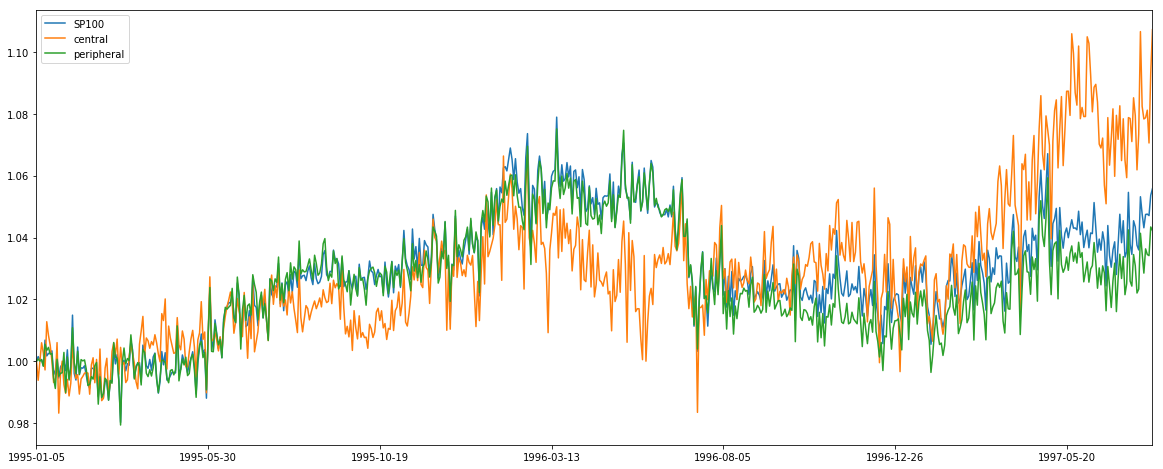

In [8]:
%matplotlib inline

performance_comparison_weighted['Newman']['betweenness'].plot(figsize=(20, 8))

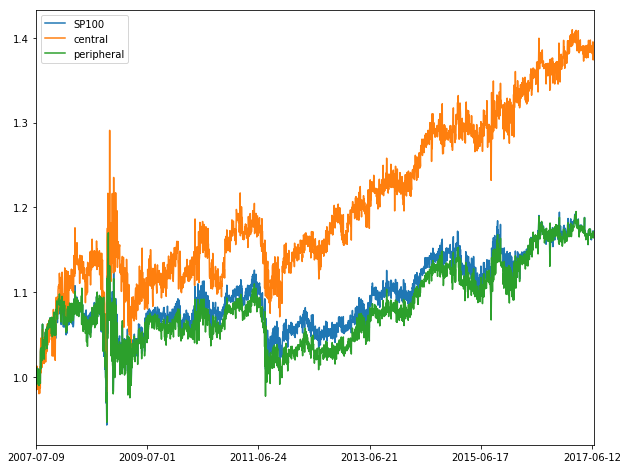

In [20]:
performance_comparison_weighted['ClausetNewman']['betweenness'].plot(figsize=(10, 8))

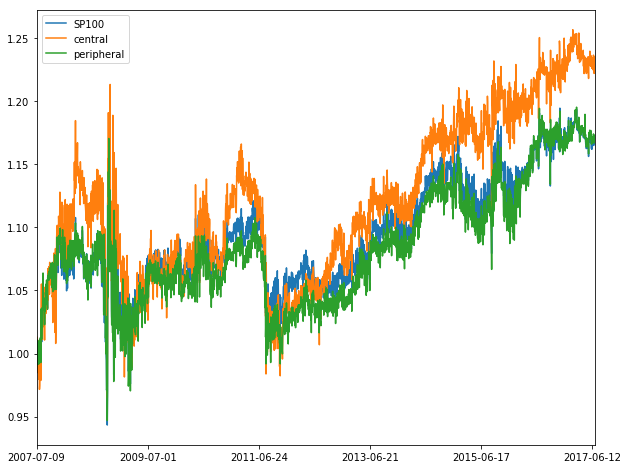

In [33]:
performance_comparison_weighted['Newman']['betweenness'].plot(figsize=(10, 8))